# From preprocess results

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from matplotlib import colors

## Average event image

In [5]:
def get_event_image(sample_dir):
    sample_name = ['VBF_H5pp_ww_jjjj', 'VBF_H5mm_ww_jjjj', 'VBF_H5z_zz_jjjj',
                   'VBF_H5p_wz_jjjj', 'VBF_H5m_wz_jjjj', 'VBF_H5z_ww_jjjj']
    pT = [0,0,0,0,0,0]
    Qk = [0,0,0,0,0,0]
    N = [0,0,0,0,0,0]
    
    for i in range(6):
        with open(os.path.join(sample_dir, f'{sample_name[i]}.count'), 'r') as f:
            N[i] = int(f.read())
        with open(os.path.join(sample_dir, f'{sample_name[i]}.npy'),'rb') as f:
            for fig_id in tqdm(range(N[i])):
                data = np.load(f, allow_pickle=True)[1:]
                pT[i] += data[0]
                Qk[i] += data[1]
    
    return {'pT': pT,'Qk': Qk, 'N': N}

In [9]:
sample_dir = '/home/r10222035/Boosted_V/sample/event_samples_kappa0.15-10k/'
data = get_event_image(sample_dir)

N = data['N']
pT = data['pT']
Qk = data['Qk']

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 479/479 [00:00<00:00, 5334.42it/s]


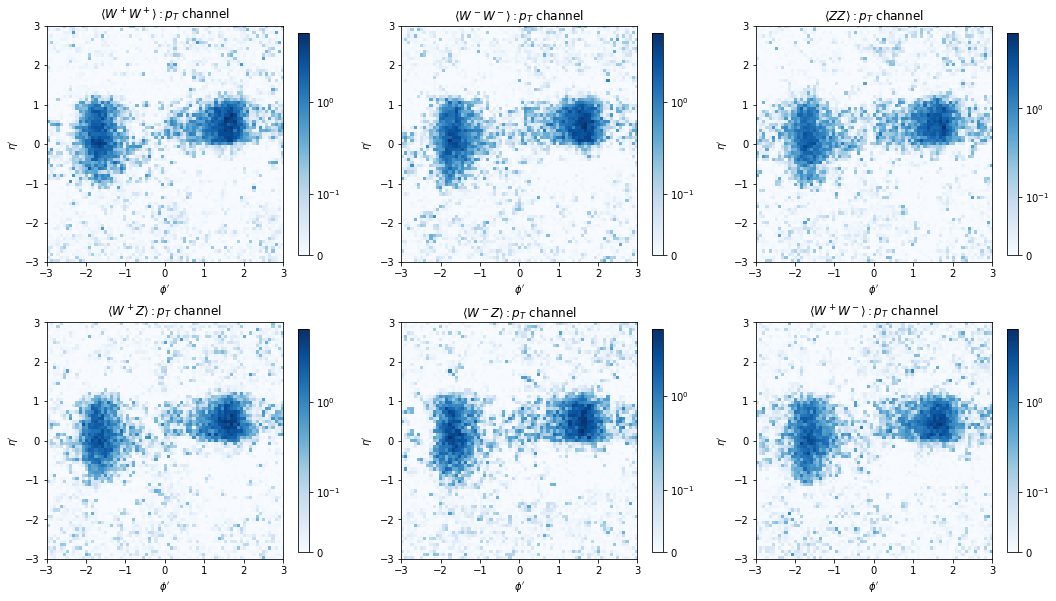

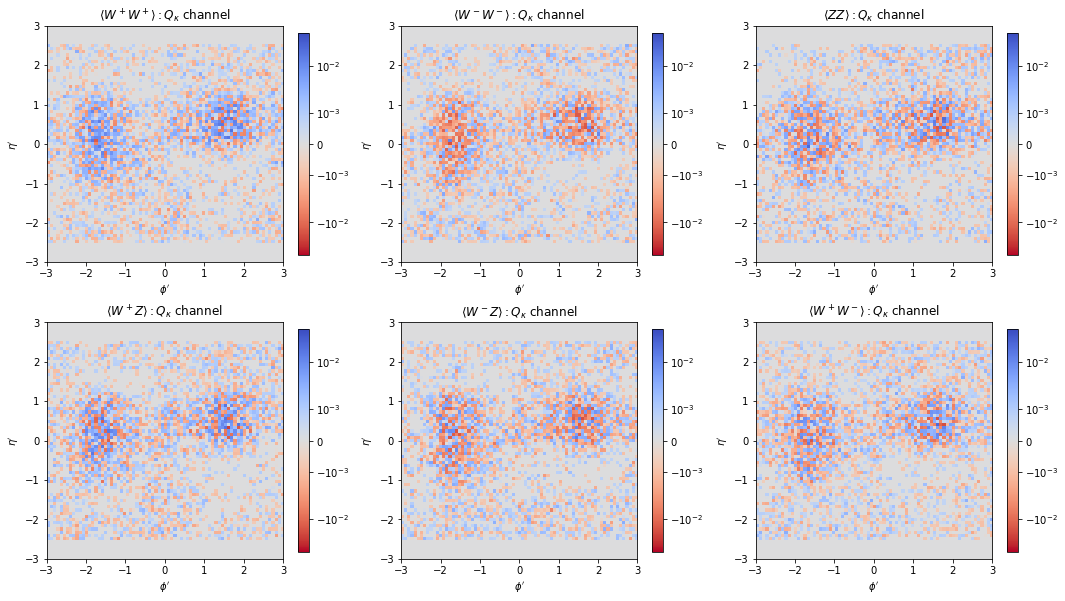

In [11]:
event_type = ['W^+W^+', 'W^-W^-', 'ZZ', 'W^+Z', 'W^-Z', 'W^+W^-' ]
event_range = [-3,3,-3,3]

fig, ax = plt.subplots(2,3, figsize=(18,10)) 
ax = [x for row in ax for x in row]
for i in range(6):            
    # P_T distribution
    imag = ax[i].imshow(pT[i]/N[i], origin='lower', extent=event_range, norm=colors.SymLogNorm(linthresh=0.1, linscale=0.6 ,vmin=0), cmap='Blues')
    plt.colorbar(imag, ax=ax[i], shrink=0.9)
    ax[i].set_title(f'$\\langle {event_type[i]}\\rangle: p_T$ channel')
    ax[i].set_xlabel('$\phi^\prime$')
    ax[i].set_ylabel('$\eta^\prime$') 
plt.savefig('figures/event_image_PT', facecolor='White', dpi=300, bbox_inches = 'tight')

fig, ax = plt.subplots(2,3, figsize=(18,10)) 
ax = [x for row in ax for x in row]
for i in range(6): 
    # Q_k distribution
    imag = ax[i].imshow(Qk[i]/N[i], origin='lower', extent=event_range, interpolation='nearest', norm=colors.SymLogNorm(linthresh=0.001, linscale=0.6,vmax=5e-2,vmin=-5e-2), cmap='coolwarm_r')
    plt.colorbar(imag, ax=ax[i], shrink=0.9)
    ax[i].set_title(f'$\\langle {event_type[i]}\\rangle: Q_\\kappa$ channel')
    ax[i].set_xlabel('$\phi^\prime$')
    ax[i].set_ylabel('$\eta^\prime$')

plt.savefig('figures/event_image_Qk', facecolor='White', dpi=300, bbox_inches = 'tight') 
plt.show()

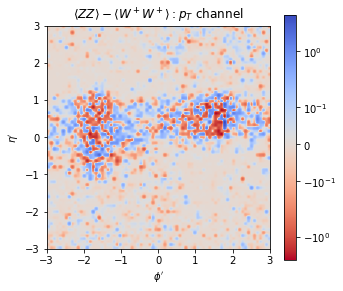

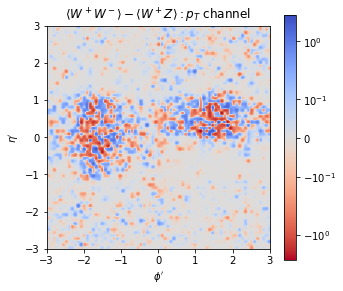

In [12]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
## P_T distribution

imag = ax.imshow(pT[2]/N[2] - pT[0]/N[0], origin='lower', extent=event_range, norm=colors.SymLogNorm(linthresh=0.1, linscale=0.6), cmap='coolwarm_r')
plt.colorbar(imag, ax=ax, shrink=0.9)
ax.set_title(r'$\langle ZZ \rangle-\langle W^+W^+\rangle: p_T$ channel')
ax.set_xlabel(r'$\phi^\prime$')
ax.set_ylabel(r'$\eta^\prime$')

plt.savefig('figures/event_image_PT_ZZ-W+W+', facecolor='White', dpi=300, bbox_inches = 'tight')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(5,5))
## P_T distribution

imag = ax.imshow(pT[5]/N[5] - pT[3]/N[3], origin='lower', extent=event_range, norm=colors.SymLogNorm(linthresh=0.1, linscale=0.6), cmap='coolwarm_r')
plt.colorbar(imag, ax=ax, shrink=0.9)
ax.set_title(r'$\langle W^+W^- \rangle-\langle W^+Z\rangle: p_T$ channel')
ax.set_xlabel(r'$\phi^\prime$')
ax.set_ylabel(r'$\eta^\prime$')

# plt.savefig('figures/jet_image_PT_Z-W+', facecolor='White', dpi=300)
plt.show()

## Single event 

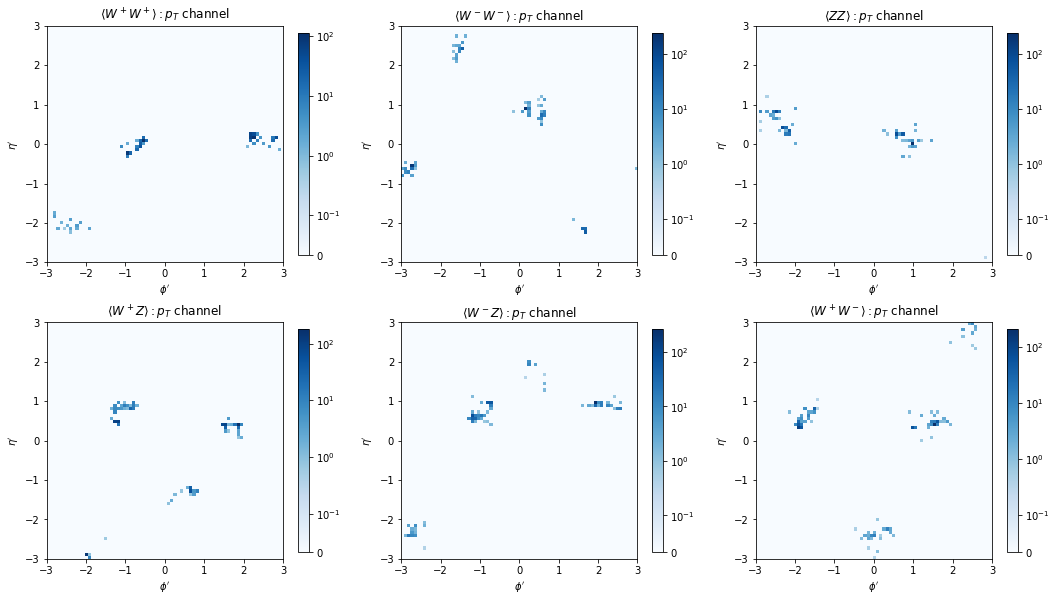

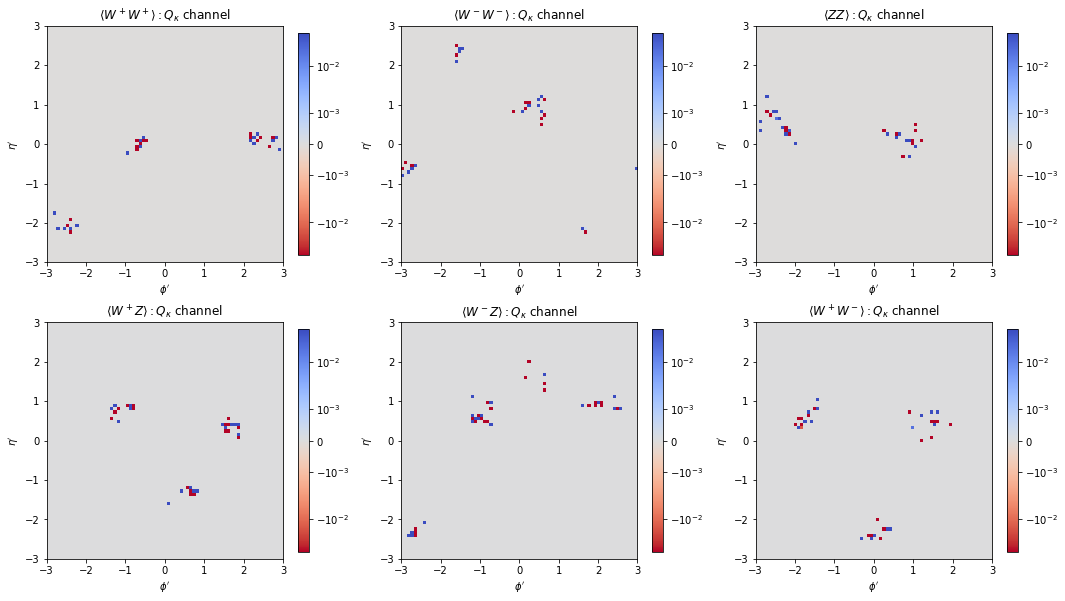

In [13]:
sample_name = ['VBF_H5pp_ww_jjjj', 'VBF_H5mm_ww_jjjj', 'VBF_H5z_zz_jjjj',
                'VBF_H5p_wz_jjjj', 'VBF_H5m_wz_jjjj', 'VBF_H5z_ww_jjjj']
pT = [0,0,0,0,0,0]
Qk = [0,0,0,0,0,0]
N = [1,1,1,1,1,1]

for i in range(6):
    with open(os.path.join(sample_dir, f'{sample_name[i]}.npy'),'rb') as f:
        data = np.load(f, allow_pickle=True)[1:]
        pT[i] += data[0]
        Qk[i] += data[1]
        
event_type = ['W^+W^+', 'W^-W^-', 'ZZ', 'W^+Z', 'W^-Z', 'W^+W^-' ]
event_range = [-3,3,-3,3]

fig, ax = plt.subplots(2,3, figsize=(18,10)) 
ax = [x for row in ax for x in row]
for i in range(6):            
    # P_T distribution
    imag = ax[i].imshow(pT[i]/N[i], origin='lower', extent=event_range, norm=colors.SymLogNorm(linthresh=0.1, linscale=0.6 ,vmin=0), cmap='Blues')
    plt.colorbar(imag, ax=ax[i], shrink=0.9)
    ax[i].set_title(f'$\\langle {event_type[i]}\\rangle: p_T$ channel')
    ax[i].set_xlabel('$\phi^\prime$')
    ax[i].set_ylabel('$\eta^\prime$') 
plt.savefig('figures/single_event_image_PT', facecolor='White', dpi=300, bbox_inches = 'tight')

fig, ax = plt.subplots(2,3, figsize=(18,10))
ax = [x for row in ax for x in row]        
for i in range(6):
    # Q_k distribution
    imag = ax[i].imshow(Qk[i]/N[i], origin='lower', extent=event_range, interpolation='nearest', norm=colors.SymLogNorm(linthresh=0.001, linscale=0.6,vmax=5e-2,vmin=-5e-2), cmap='coolwarm_r')
    plt.colorbar(imag, ax=ax[i], shrink=0.9)
    ax[i].set_title(f'$\\langle {event_type[i]}\\rangle: Q_\\kappa$ channel')
    ax[i].set_xlabel('$\phi^\prime$')
    ax[i].set_ylabel('$\eta^\prime$')
    
plt.savefig('figures/single_event_image_Qk', facecolor='White', dpi=300, bbox_inches = 'tight')
plt.show()